In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('supermarket_sales.csv')
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
354,320-49-6392,C,Naypyitaw,Normal,Female,Electronic accessories,30.24,1,1.512,31.752,3/4/2019,15:44,Cash,30.24,4.761905,1.512,8.4
939,500-02-2261,C,Naypyitaw,Normal,Female,Food and beverages,57.29,6,17.187,360.927,3/21/2019,17:04,Ewallet,343.74,4.761905,17.187,5.9
182,851-28-6367,A,Yangon,Member,Male,Sports and travel,15.50,10,7.750,162.750,3/23/2019,10:55,Ewallet,155.00,4.761905,7.750,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Branch Performance in terms of total sales

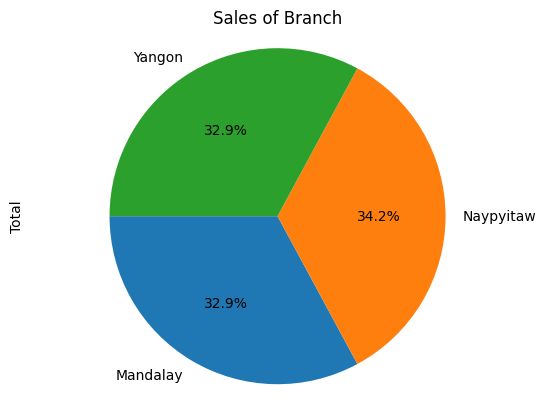

In [6]:
city_branch = df.groupby('City')['Total'].sum()
city_branch

#Visualize
#colors = ['#3B979B','#ACB292', '#C49F7D']
ax = city_branch.plot(kind='pie', autopct='%1.1f%%', startangle=180)
ax.axis('equal')

plt.title('Sales of Branch')
plt.show()

# The product line that contributes the most to revenue

In [8]:
product_line = df.groupby('Product line')['Total'].sum().sort_values().reset_index()
product_line.columns = ['Product line','Total sale']
product_line

fig = px.bar(product_line, x='Total sale', y='Product line', color='Total sale', orientation='h')
fig.update_layout(
    title='Sales of Product Lines',
    width=700,
    height=500
)
fig.show()

# Peak Months and Hours

In [9]:
#Parsing date
df['Date'] = pd.to_datetime(df['Date'])

# Add a year column
df['year'] = df['Date'].dt.year
df['year'].unique()

#Add a month column
df['month'] = df['Date'].dt.month
df['month'].unique()

array([1, 3, 2])

In [10]:
import plotly.graph_objects as go


In [17]:
observe_trends = df.groupby('month')['Total'].sum().reset_index()

#Visualizations
fig = go.Figure()

#Bar
fig.add_trace(go.Bar(
    x=observe_trends['month'],
    y=observe_trends['Total'],
    name='Total Sales',
    marker_color='springgreen',
    width=0.3
))

#line
fig.add_trace(go.Scatter(
    x=observe_trends['month'],
    y=observe_trends['Total'],
    name = 'Trend Line',
    mode = 'lines+markers',
    line=dict(color='yellowgreen', width=1.5)
))

#Layouts
fig.update_layout(
    title ='Sales by Month',
    width = 700,
    height = 500,
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['January', 'February', 'March'],
        title='Month'
    ),
    yaxis=dict(title='Total Sales')
)

In [20]:
# Parsing Time
df['Time'] = pd.to_datetime(df['Time'], format ='%H:%M:%S').dt.time

#Extracting Hours
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour

#Sales for each hour
hourly_sales = df.groupby('Hour')['Total'].sum()

#Transactions counts each hour
hourly_transactions = df.groupby('Hour').size()

#Creating subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

#Sales each hour
hourly_sales.plot(kind='bar', ax=ax[0], color='seagreen')
ax[0].set_title('Hourly Sales Total')
ax[0].set_xlabel('Hour of The Day')
ax[0].set_ylabel('Total Sales')

#Transaction counts each hour
hourly_sales.plot(kind='bar', ax=ax[1], color='seagreen')
ax[1].set_title('Hourly Transactions')
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


ValueError: time data "13:08" doesn't match format "%H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Customer Behavior

Text(0.5, 1.0, 'Total Sales by Gender')

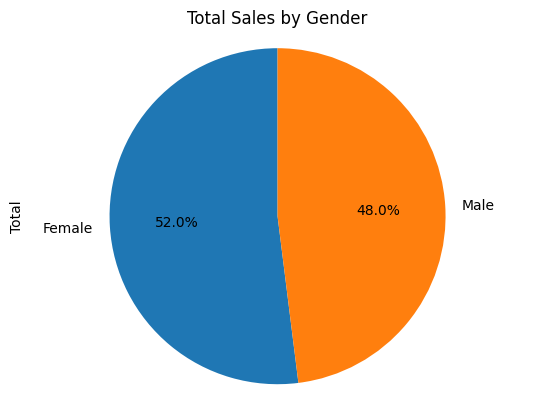

In [24]:
# Gender
gender_sales = df.groupby('Gender')['Total'].sum()
gender_sales

#Visualization
ax = gender_sales.plot(kind ='pie', autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Total Sales by Gender')

In [29]:
#Product Line by Gender
gender = df.groupby(['Product line','Gender']).size().reset_index()
gender.columns = ['Product line','Gender','Count']
gender

#Grouped bar chart
fig = px.bar(gender, x = 'Product line', y = 'Count', color ='Gender',barmode ='group')

#layouts
fig.update_layout(
    height=500,
    width=900,
    title = 'Product line by Gender'
)
fig.show()

Text(0.5, 1.0, 'Total Sales by Customer Type')

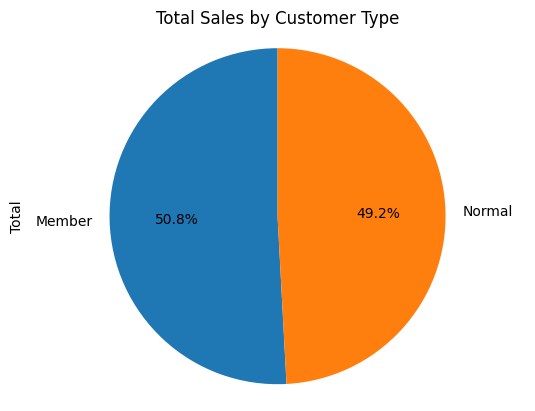

In [36]:
# Customer Type (Member or Normal)
customer_type = df.groupby('Customer type')['Total'].sum()
customer_type

ax = customer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Total Sales by Customer Type')


In [38]:
# Product line by Customer Type
customer = df.groupby(['Product line','Customer type']).size().reset_index()
customer.columns=['Product line', 'Customer type', 'Count']

#Grouped bar chart
fig =px.bar(customer, x = 'Product line', y='Count', color='Customer type', barmode='group')

#layouts
fig.update_layout(
    height = 500,
    width = 900,
    title = 'Product Line by Customer Type'
)